<a href="https://colab.research.google.com/github/kumarkaushaliimu/Model_explainability/blob/main/Model_Explainability_PDP_and_ICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
#converting into dataframe
iris_df = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )

In [3]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [4]:
species = []

for i in range(len(iris_df['target'])):
    if iris_df['target'][i] == 0:
        species.append("setosa")
    elif iris_df['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris_df['species'] = species

In [5]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [6]:
iris_df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [20]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
84,5.4,3.0,4.5,1.5
148,6.2,3.4,5.4,2.3
53,5.5,2.3,4.0,1.3
5,5.4,3.9,1.7,0.4
93,5.0,2.3,3.3,1.0
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [7]:
from sklearn.model_selection import train_test_split

# Droping the target and species since we only need the measurements
X = iris_df.drop(['target','species'], axis=1)

# converting into numpy array and assigning petal length and petal width
#X = X.to_numpy()[:, (2,3)]
y = iris['target']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
#log_reg = LogisticRegression()
#log_reg.fit(X_train,y_train)

mc_clf = GradientBoostingClassifier(n_estimators=10,max_depth=1).fit(X_train, y_train)


In [15]:
training_prediction = mc_clf.predict(X_train)
training_prediction

array([1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0,
       0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1,
       1, 2, 2, 0, 1, 1, 0, 1, 2])

In [16]:
test_prediction = mc_clf.predict(X_test)
test_prediction

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0,
       1, 2, 0, 1, 2, 0, 2, 2, 1])

In [17]:
from sklearn import metrics

print("Precision, Recall, Confusion matrix, in training\n")

# Precision Recall scores
print(metrics.classification_report(y_train, training_prediction, digits=3))

# Confusion matrix
print(metrics.confusion_matrix(y_train, training_prediction))


Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        21
           1      0.926     0.926     0.926        27
           2      0.926     0.926     0.926        27

    accuracy                          0.947        75
   macro avg      0.951     0.951     0.951        75
weighted avg      0.947     0.947     0.947        75

[[21  0  0]
 [ 0 25  2]
 [ 0  2 25]]


In [12]:
features = [0, 1, (0, 1)]

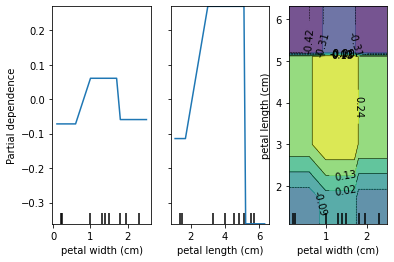

In [22]:
from sklearn.inspection import PartialDependenceDisplay
features = [3, 2, (3, 2)]
PartialDependenceDisplay.from_estimator(mc_clf, X_train, features,target =1)